Mining Social and Geographic Datasets
-----------------------------------

Lab Class 6: Kmeans clustering (Scikit-learn)
-------------------------------

https://scikit-learn.org/

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import folium 
from sklearn.cluster import KMeans
from sklearn import datasets


### load dataframe from scikitlearn dataset

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [9]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### run k-means clustering on iris data

In [10]:
k=3
k_means = KMeans(n_clusters=k)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### predict cluster labels

In [22]:
cluster_labels = k_means.fit_predict(X)
colors = cm.nipy_spectral(cluster_labels.astype(float) / k,bytes=False)

In [23]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### colour-up clusters and visualise

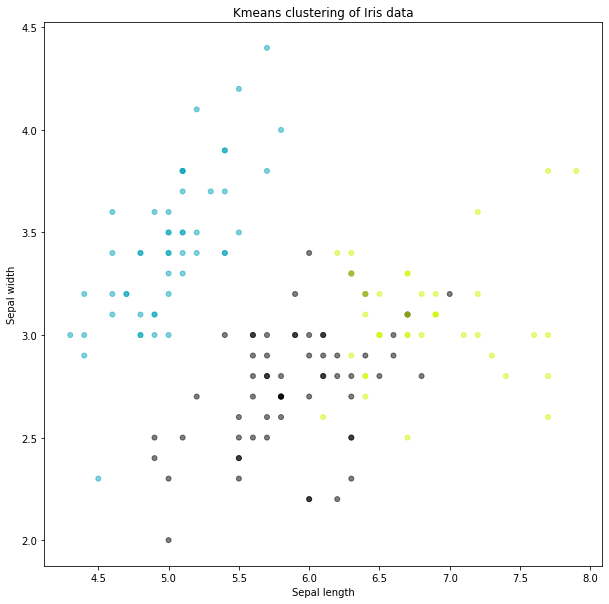

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], marker='o', s=25, alpha=0.5,
            c=colors)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Kmeans clustering of Iris data')
plt.show()

### plot elbow curve to identify number of clusters

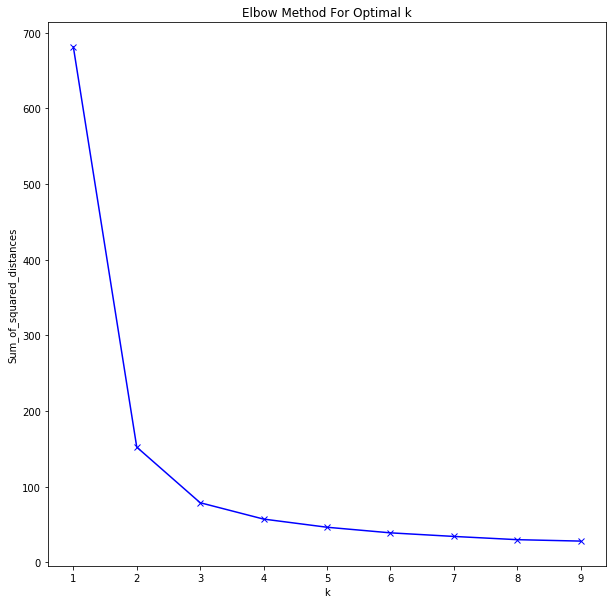

In [6]:
Sum_of_squared_distances=[]
K=np.arange(1,10)
for i in K:
    kmeans=KMeans(n_clusters=i, n_init=10)
    kmeans=kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.figure(figsize=(10,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Lab Exercise 6: Kmeans clustering on mobility trace dataset
-------------------------------

6a) load mobility trace dataset <br />
----------------------------------------------------------

In [5]:
mt = pd.read_csv('mobility_traces.csv')
mt = mt.drop(['day'], axis=1)
mt = np.array(mt)
mt

array([[52.472665  , -1.8977818 ],
       [52.47455886, -1.90080653],
       [52.4515712 , -1.9327772 ],
       [52.45028622, -1.93212766],
       [52.4492362 , -1.9266681 ],
       [52.4517321 , -1.9327773 ],
       [52.45070005, -1.9358152 ],
       [52.4515238 , -1.9327771 ],
       [52.4516103 , -1.9327846 ],
       [52.451523  , -1.9327801 ],
       [52.47340104, -1.89821972],
       [52.472631  , -1.8978608 ],
       [52.4514701 , -1.9328281 ],
       [52.472631  , -1.8978608 ],
       [52.4515701 , -1.9327587 ],
       [52.45102515, -1.93628813],
       [52.472631  , -1.8978608 ],
       [52.472631  , -1.8978608 ],
       [52.4722453 , -1.8982359 ],
       [52.4774761 , -1.8994154 ],
       [52.4514679 , -1.9327676 ],
       [52.4514621 , -1.9327407 ],
       [52.4514247 , -1.9327415 ],
       [52.4514777 , -1.9327458 ],
       [52.4514247 , -1.9327415 ],
       [52.4488525 , -1.9373441 ],
       [52.451459  , -1.9327404 ],
       [52.4514527 , -1.9327443 ],
       [52.4514918 ,

6b) run kmeans clustering with k=3 using lon and lat as input features <br />
---------------------------------------------------------- 

In [6]:
k=3
k_means = KMeans(n_clusters=k)
k_means.fit(mt)
cluster_labels = k_means.fit_predict(mt)


6c) visualise the resulting cluster labels in folium <br />
---------------------------------------------------------- 
hint: set the classes back to dataframe with a list of colors using pd.cut

In [7]:
colors = cm.nipy_spectral(cluster_labels.astype(float) / k,bytes=False)

In [9]:
x1=np.median(mt['longitude'])
y1=np.median(mt['latitude'])
m = folium.Map([y1,x1], zoom_start=11,tiles='Stamen Toner')

for i, row in mt.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=10,
                        color=row['labels_color']
                       ).add_to(m)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

6d) repeat the same procedure where k=5 <br />
---------------------------------------------------------- 

In [49]:
k=5
k_means = KMeans(n_clusters=k)
k_means.fit(mt)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [50]:
cluster_labels = k_means.fit_predict(mt)
colors = cm.nipy_spectral(cluster_labels.astype(float) / k,bytes=False)

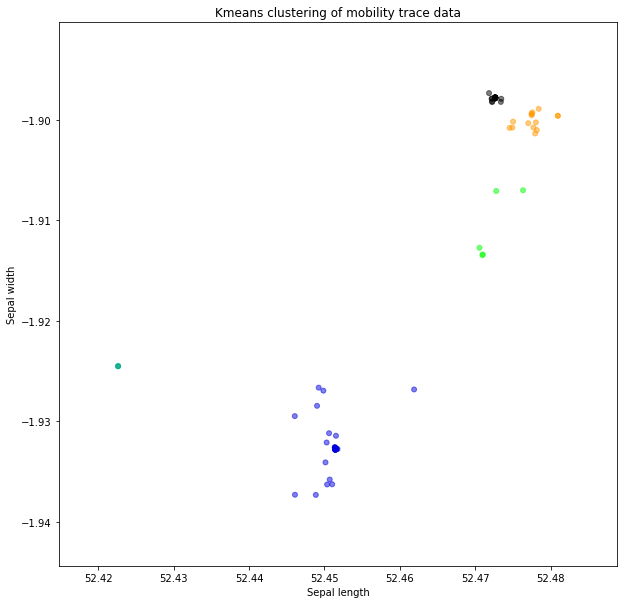

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(mt[:,0], mt[:,1], marker='o', s=25, alpha=0.5,
            c=colors)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Kmeans clustering of mobility trace data')
plt.show()

6e) find optimal number of clusters using the elbow method <br />
---------------------------------------------------------- 

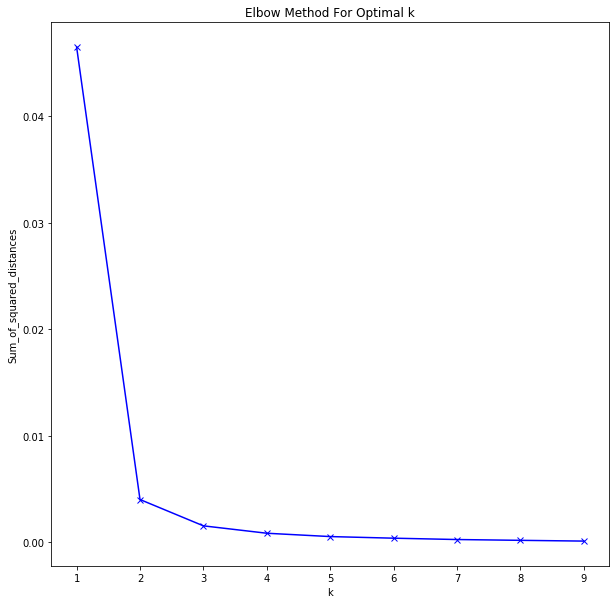

In [53]:
Sum_of_squared_distances=[]
K=np.arange(1,10)
for i in K:
    kmeans=KMeans(n_clusters=i, n_init=10)
    kmeans=kmeans.fit(mt)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.figure(figsize=(10,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

6f) visualise the optimal number of clusters in folium <br />
---------------------------------------------------------- 